In [60]:
!pip install ujson
import random
import os
import argparse
from pathlib import Path
from tqdm import tqdm
import re
import codecs
import json
from operator import itemgetter
import random
import os
import argparse
from pathlib import Path
from tqdm import tqdm
import re
import codecs
import json
import ujson
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
from google.colab import drive 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
with codecs.open('/content/drive/MyDrive/msr2014_bugreport/eclipse/eclipse_clear.json', 'r') as f:
  lines = f.readlines()

In [63]:
a = list()
for line in tqdm(lines):
    item = ujson.loads(line)
    if len(item['dup_id']) != 0:
      a.append([item['dup_id'],item['bug_id'],item["component"]])
a = sorted(a)
data1_1 = DataFrame(a)
data1_1.columns = ['dup_id','bug_id','sub_component']


100%|██████████| 361006/361006 [00:07<00:00, 51415.56it/s]


In [64]:
b = list()
for line in tqdm(lines):
    item = ujson.loads(line)
    b.append([item['bug_id'],item["component"]])
b = sorted(b)
data1_2 = DataFrame(b)
data1_2.columns = ['bug_id','component']

100%|██████████| 361006/361006 [00:09<00:00, 39583.68it/s]


In [65]:
data1_dict = {} #生成字典用于查找master
for key, value in data1_2.iterrows():
    data1_dict[value[0]] = value[1]

In [66]:
master = []
for dup_id in data1_1['dup_id']:
  master.append(data1_dict.get(dup_id))


In [67]:
data1_1.insert(3,'master_component',master)


In [68]:
data_del_blank = data1_1.dropna(subset=['master_component'],how='all')
print(data_del_blank)

       dup_id  bug_id sub_component master_component
0           1     183          Team             Team
1          10  121067           APT             Team
2       10001   24181            UI               UI
3      100013  100042    jst.server       jst.server
4      100032  126166       Runtime          Runtime
...       ...     ...           ...              ...
39518   99984  134530           SWT              SWT
39519   99984  135542         Debug              SWT
39520   99984  137875            UI              SWT
39521   99984   52871            UI              SWT
39522   99996   99387          Team            Debug

[39523 rows x 4 columns]


In [69]:
temp = []
for index, row in data_del_blank .iterrows():
  if row['master_component'] != row['sub_component']:
    temp.append(0)
  else:
    temp.append(1)
  


In [70]:
data_del_blank.insert(4,'same component?',temp)
print(data_del_blank)

       dup_id  bug_id sub_component master_component  same component?
0           1     183          Team             Team                1
1          10  121067           APT             Team                0
2       10001   24181            UI               UI                1
3      100013  100042    jst.server       jst.server                1
4      100032  126166       Runtime          Runtime                1
...       ...     ...           ...              ...              ...
39518   99984  134530           SWT              SWT                1
39519   99984  135542         Debug              SWT                0
39520   99984  137875            UI              SWT                0
39521   99984   52871            UI              SWT                0
39522   99996   99387          Team            Debug                0

[39523 rows x 5 columns]


In [71]:
same = temp.count(1)
different = temp.count(0)

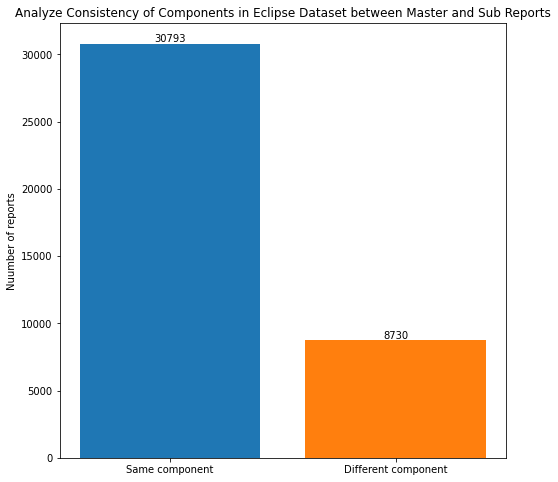

In [72]:

# 准备数据
x_data = ["Same component","Different component"]
y_data = [same,different]
# 画图，plt.bar()可以画柱状图
for i in range(len(x_data)):
	plt.bar(x_data[i], y_data[i])
# 设置图片名称
plt.title("Analyze Consistency of Components in Eclipse Dataset between Master and Sub Reports")
# 设置y轴标签名
plt.ylabel("Nuumber of reports")
for a,b in zip(x_data,y_data):
	plt.text(a, b-0.3,'%d'%b, ha = 'center',va = 'bottom',fontsize=10)
# 显示
plt.rcParams['figure.figsize'] = (8.0, 8.0) # 单位是inches
plt.savefig("Eclipse_component_fig")
plt.show()
